Notebook para experimentar con el cálculo de la SNR de imágenes EL. Calcular la relación señal-ruido promedio SNR50 según lo definido por IEC NP 60904-13 necesita 2 imágenes EL de referencia y una imagen de fondo

In [2]:
# Importar librerías

import numpy as np
import matplotlib.pyplot as plt
import cv2
from os import listdir, path

In [3]:
# Función para el cálculo de la relación señal a ruido (SNR) promedio SNR50

def SNR_IEC(i1, i2, ibg=0, allow_color_images=False):
    """
    Calculla la relación señal a ruido (SNR) promedio SNR50 según la norma IEC 60904-13

    Parámetros

    i1: numpy.ndarray
        Imagen de referencia
    i2: numpy.ndarray
        Imagen a comparar
    ibg: float
        Imagen del fondo
    allow_color_images: bool
        Permite el uso de imágenes a color

    Retorna

    snr50: float
        Relación señal a ruido (SNR) promedio SNR50
    """
    # Validar que las imágenes sean del tipo float64 (doble precisión):
    #i1 = i1.astype(np.float64)
    #i2 = i2.astype(np.float64)
    i1 = np.asfarray(i1)
    i2 = np.asfarray(i2)
    if np.any(ibg != 0):
        #ibg = ibg.astype(np.float64)
        ibg = np.asfarray(ibg)
        assert i1.shape == ibg.shape, "Las imágenes deben tener la misma resolución"
    # Validar que las imágenes tengan la misma resolución:
    if i1.shape != i2.shape:
        raise ValueError("Las imágenes deben tener la misma resolución")
    
    # Validar que las imágenes sean en escala de grises:
    if not allow_color_images:
        if len(i1.shape) == 3:
            raise ValueError("Las imágenes deben ser en escala de grises")
        
    # SNR definido por la norma IEC 60904-13
    signal = 0.5 * (i1 + i2) -ibg
    noise = 0.5**0.5 * np.abs(i1 - i2) * ((2 / np.pi)**0.5)
    signal = signal.sum()
    noise = noise.sum()

    snr50 = signal / noise

    return snr50
    

In [4]:
# Función para la lectura de imágenes

def read_images(directory, allow_color_images=False):
    """
    Lee todas las imágenes en un directorio

    Parámetros

    directory: str
        Directorio con las imágenes
    allow_color_images: bool
        Permite el uso de imágenes a color

    Retorna

    images: list
        Lista con las imágenes
    """
    # Leer todas las imágenes en el directorio
    images = []
    for f in listdir(directory):
        if f.endswith('.jpg') or f.endswith('.png'):
            image = cv2.imread(path.join(directory, f), cv2.IMREAD_GRAYSCALE)
            if allow_color_images:
                image = cv2.imread(path.join(directory, f), cv2.IMREAD_COLOR)
            images.append(image)
    return images

datasetEL = imágenes originales EL.  
datasetBG = imágenes originales del fondo.

In [5]:
# Ruta de las imágenes
image_path = "E:/Panel_30W/P13/8/JPEG_8"
background_path ="E:/Panel_30W/P13/8/fondo_8/JPEG_fondo_8"

datasetEL = read_images(image_path)
datasetBG = read_images(background_path)

# Imprime el número de imágenes en cada dataset
# para probar que las imágenes se agregaron
print("Imágenes en el dataset EL: ", len(datasetEL))
print("Imágenes en el dataset BG: ", len(datasetBG))

Imágenes en el dataset EL:  51
Imágenes en el dataset BG:  51


In [9]:
# Cálculo de la SNR50

image1 = datasetEL[0]
image2 = datasetEL[1]
background_image = datasetBG[1]

# Calcular SNR con imagen de fondo
snr_background = SNR_IEC(image1, image2, background_image)
print("SNR con imagen de fondo:", snr_background)

SNR con imagen de fondo: 34.269107648428324


SNR promedio SNR50: 34.264843883940856


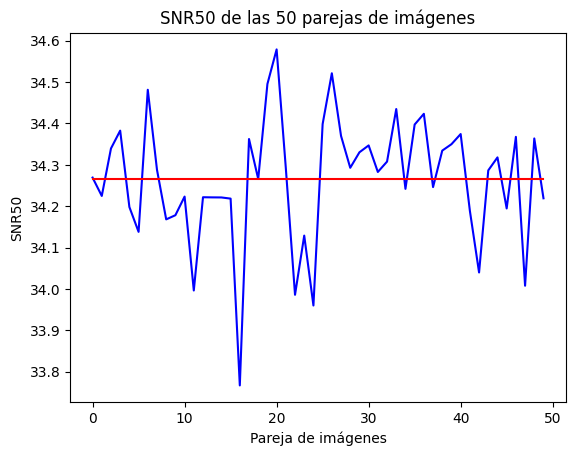

In [14]:
# Cálculo de la SNR50 de las 50 parejas de imágenes
snr50 = []
for i in range(0, 50):
    image1 = datasetEL[i]
    image2 = datasetEL[i+1]
    background_image = datasetBG[i+1]
    snr = SNR_IEC(image1, image2, background_image)
    snr50.append(snr)

print("SNR promedio SNR50:", np.mean(snr50))

# Gráfica de la SNR50 y el promedio de las 50 parejas de imágenes
plt.figure()
plt.plot(snr50, label="SNR50", color="blue")
plt.plot([np.mean(snr50)]*50, label="SNR50 promedio", color="red")
plt.xlabel("Pareja de imágenes")
plt.ylabel("SNR50")
plt.title("SNR50 de las 50 parejas de imágenes")
plt.show()



In [ ]:
print()